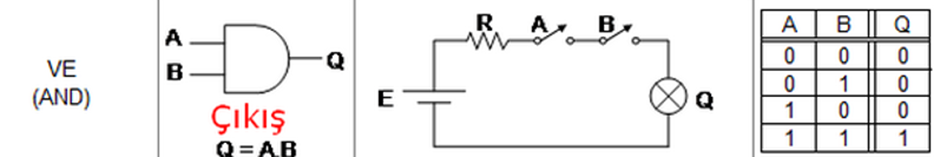

In [1]:
import numpy as np
import pandas as pd

x = np.array([[0,0], [0,1],[1,0],[1,1]]) # girdiler
y = np.array([0,0,0,1]).reshape(-1,1) # çıktılar
lr = 0.1 # learning rate (öğrenme oranı)
bias = 0 # bias

# ağırlıkların rassal olarak oluşturulması
weights1 = np.random.random((2,4))
weights2 = np.random.random((4,1))

# sigmoid fonksiyonu
def sigmoid(x):
    return (1 / (1 + np.exp(-x)))

# gradient descent ağırlıkları güncellerken kullanılacak fonksiyon
def turev(x):
    return x * (1 - x)

print(x.shape)
print(y.shape)
print("\n", "weights1\n", weights1,"\n\n", "weights2\n", weights2)

(4, 2)
(4, 1)

 weights1
 [[0.8429361  0.35623422 0.760602   0.68750389]
 [0.21427315 0.10757922 0.99129462 0.76178942]] 

 weights2
 [[0.24227015]
 [0.83494522]
 [0.65835306]
 [0.13562404]]


### YSA'nın Eğitilmesi

In [2]:
for i in range(10000):

#feed forward (ileri besleme)
    
    # girdi katmanından gelen girdiler ile girdilere ait ağırlıkların çarpımı ve 
    # bias değerinin eklenmesi
    z1 = np.dot(x, weights1) + bias
    
    # hesaplanan değerin sigmoid fonksiyonuna verilmesi
    a1 = sigmoid(z1)
    
    # bir önceki katmanda hesaplanan değerlerin bu katmana ait ağırlıklar ile 
    # yeniden çarpılıp toplanması
    z2 = np.dot(a1, weights2) + bias
    
    # hesaplanan yeni değerin sigmoid fonksiyonuna verilmesi
    a2 = sigmoid(z2)
    
    #loss (kayıp, hata)
    hata = y - a2
    
# back propagation (geri yayılım)
    da2 = hata * turev(a2)
    l1error  = da2.dot(weights2.T)
    da1 = l1error * turev(a1)
    
# ağırlıkların güncellenmesi
    weights2 += lr * np.dot(a1.T, da2)
    weights1 += lr * np.dot(x.T,da1)

print(f"tahmini sonuc:\n {(a2>0.5).astype(int)},\n \n weights1:\n {weights1}\
,\n \n weights2 :\n {weights2}")

tahmini sonuc:
 [[0]
 [0]
 [0]
 [1]],
 
 weights1:
 [[ 1.52044381 -2.91002088  0.7835977  -3.52667684]
 [-4.47022226  0.35304798  1.48505713  0.8010078 ]],
 
 weights2 :
 [[-6.9749704 ]
 [-5.43796701]
 [ 4.28325097]
 [-5.1485564 ]]


### YSA'nın tahminleri

In [3]:
a2

array([[0.00130656],
       [0.0344211 ],
       [0.03874176],
       [0.9441065 ]])

### YSA'nın tahminlerinin integer'a çevrilmesi

In [4]:
(a2 > 0.5).astype(int)

array([[0],
       [0],
       [0],
       [1]])

### YSA'nın tahminleri ile gerçek değerlerin (y) karşılaştırılması

In [5]:
df = pd.DataFrame(y)
df["a2"] = a2.round(2)
df["a2_"] = (a2 > 0.5).astype(int)
df["y"] = y### YSA'nın tahminlerinin integer'a çevrilmesi
df.drop(0, axis=1)

,a2,a2_,y
0,0.00,0,0
1,0.03,0,0
2,0.04,0,0
3,0.94,1,1
